In [1]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

(6000, 2)

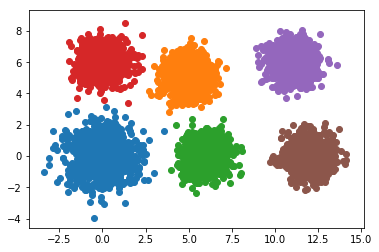

In [14]:
blob1 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 1000)
blob2 = np.random.multivariate_normal([5,5], [[0.5,0],[0,0.5]], 1000)
blob3 = np.random.multivariate_normal([6,0], [[0.5,0],[0,0.5]], 1000)
blob4 = np.random.multivariate_normal([0,6], [[0.5,0],[0,0.5]], 1000)
blob5 = np.random.multivariate_normal([11,6], [[0.5,0],[0,0.5]], 1000)
blob6 = np.random.multivariate_normal([12,0], [[0.5,0],[0,0.5]], 1000)
plt.scatter(blob1[:,0], blob1[:,1])
plt.scatter(blob2[:,0], blob2[:,1])
plt.scatter(blob3[:,0], blob3[:,1])
plt.scatter(blob4[:,0], blob4[:,1])
plt.scatter(blob5[:,0], blob5[:,1])
plt.scatter(blob6[:,0], blob6[:,1])
# data_X = np.vstack((blob1,blob2))
# data_X = np.vstack((blob1,blob2,blob3))
# data_X = np.vstack((blob1,blob2,blob3,blob4))
# data_X = np.vstack((blob1,blob2,blob3,blob4,blob5))
data_X = np.vstack((blob1,blob2,blob3,blob4,blob5,blob6))
data_X.shape

In [15]:
# Compute silhouette. Keep single to values to be able to plot it later
def calculate_silhouette(X, k_max=10, dist="cosine"):
    sils = []
    sils_sample = []
    clusters_list = []
    for k in range(2,k_max+1):
        clusters = KMeans(n_clusters=k).fit_predict(X)
        k_silhouette = silhouette_score(X, clusters, metric=dist)
        sils.append(k_silhouette)
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, clusters, metric=dist)
        sils_sample.append(sample_silhouette_values)
        clusters_list.append(clusters)
    return sils, sils_sample, clusters_list

### Cluster

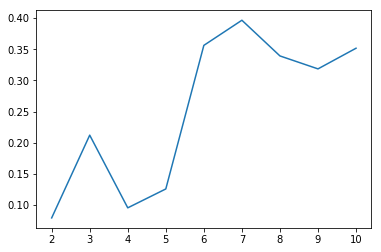

k = 7
CPU times: user 17.5 s, sys: 5.53 s, total: 23.1 s
Wall time: 19.9 s


In [16]:
%%time
k_max = 10

# Calculate sils
sils, sils_sample, clusters = calculate_silhouette(data_X, k_max)

# Plot data
plt.plot(range(2,len(sils)+2), sils)
plt.show()

# Get best k
k = np.argmax(np.asarray(sils))+2
print("k = %d" % k)

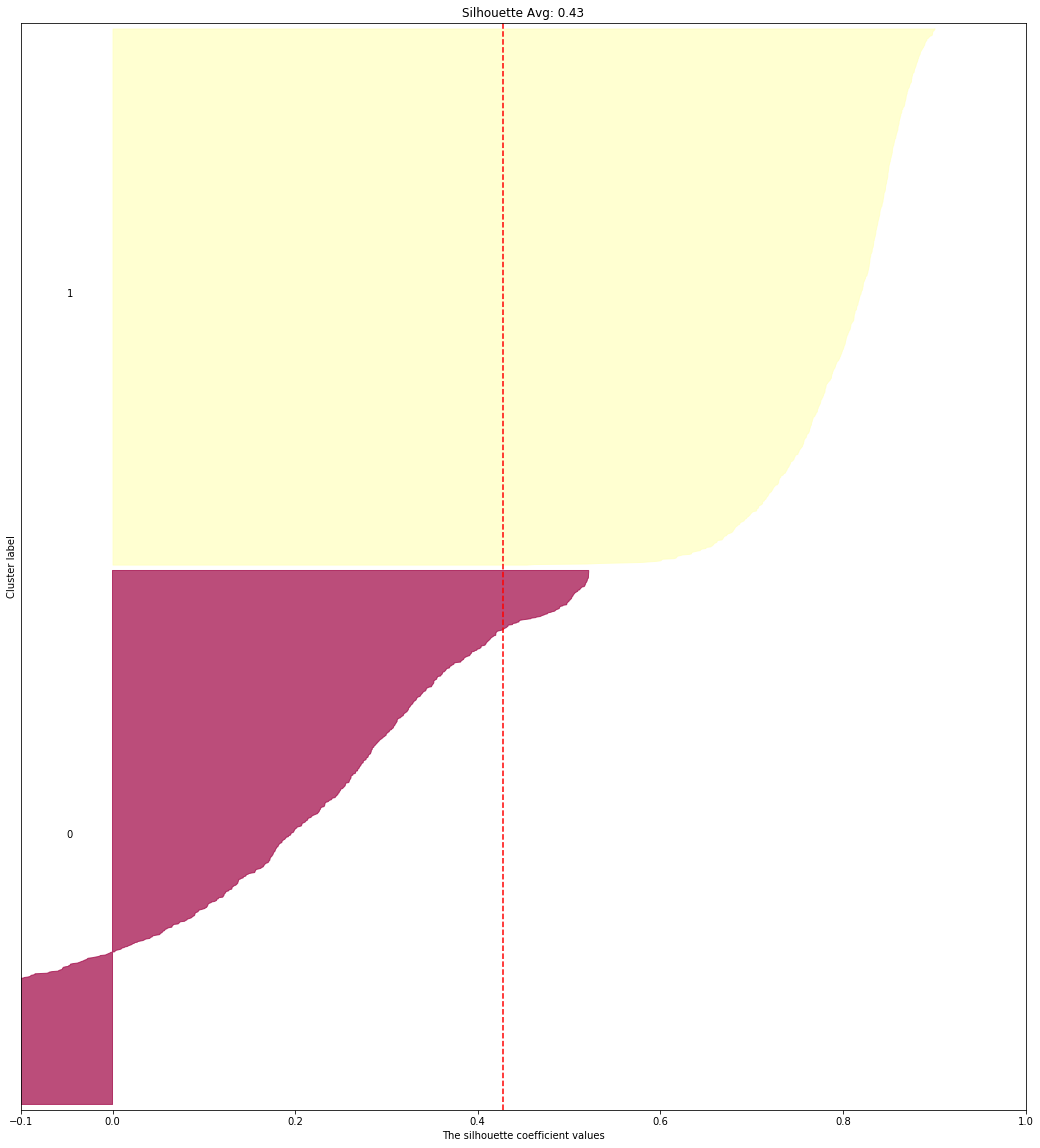

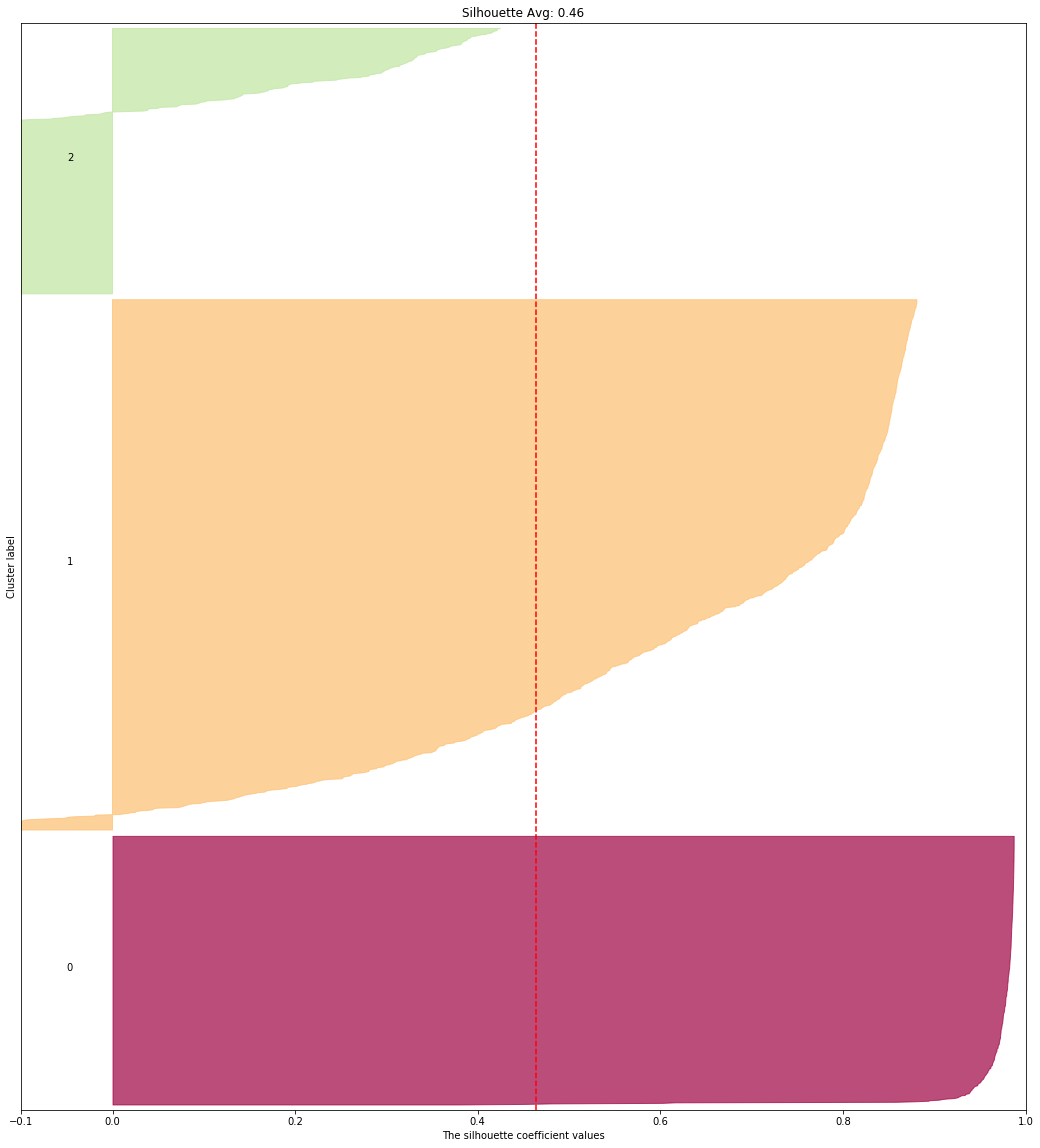

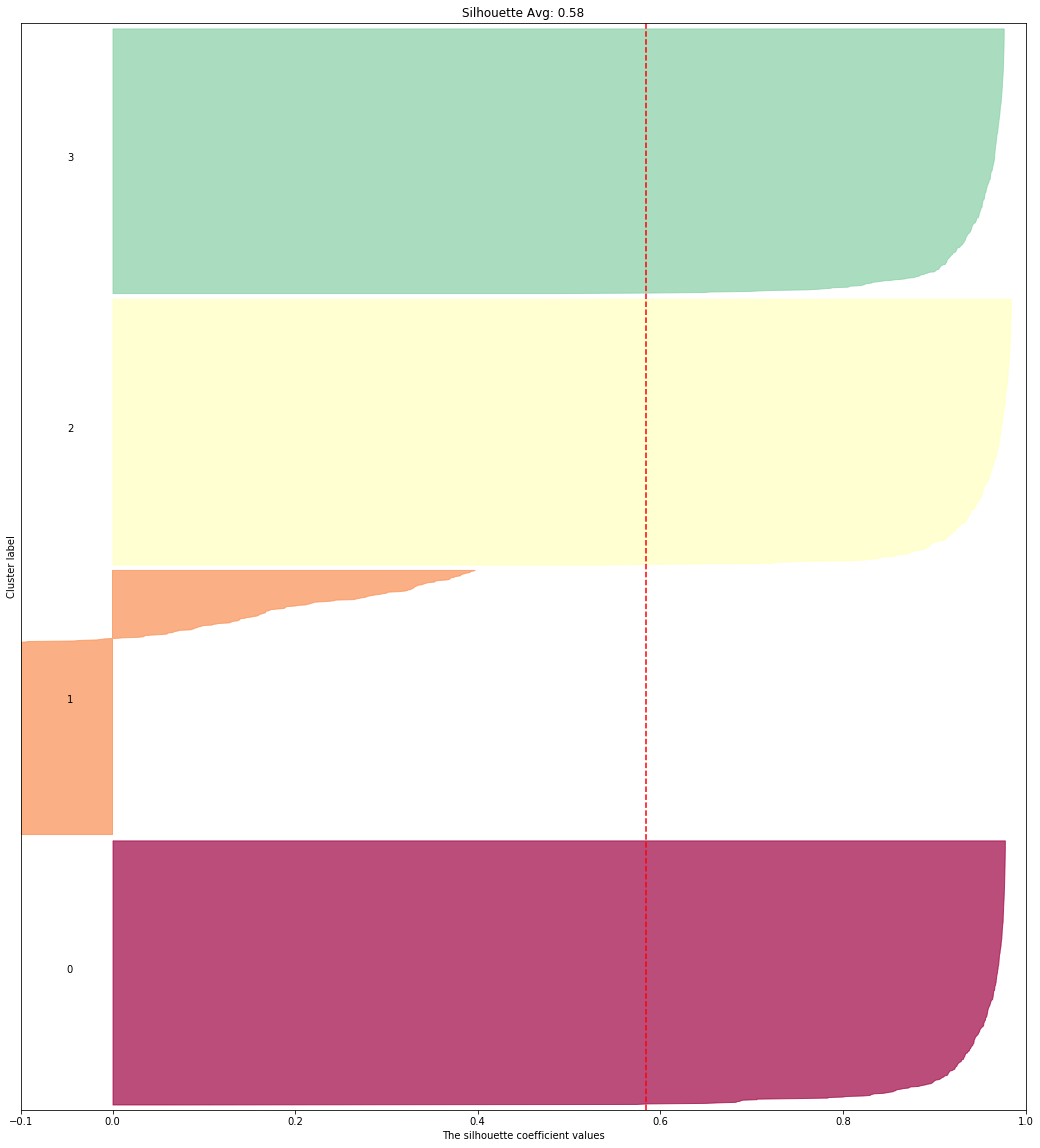

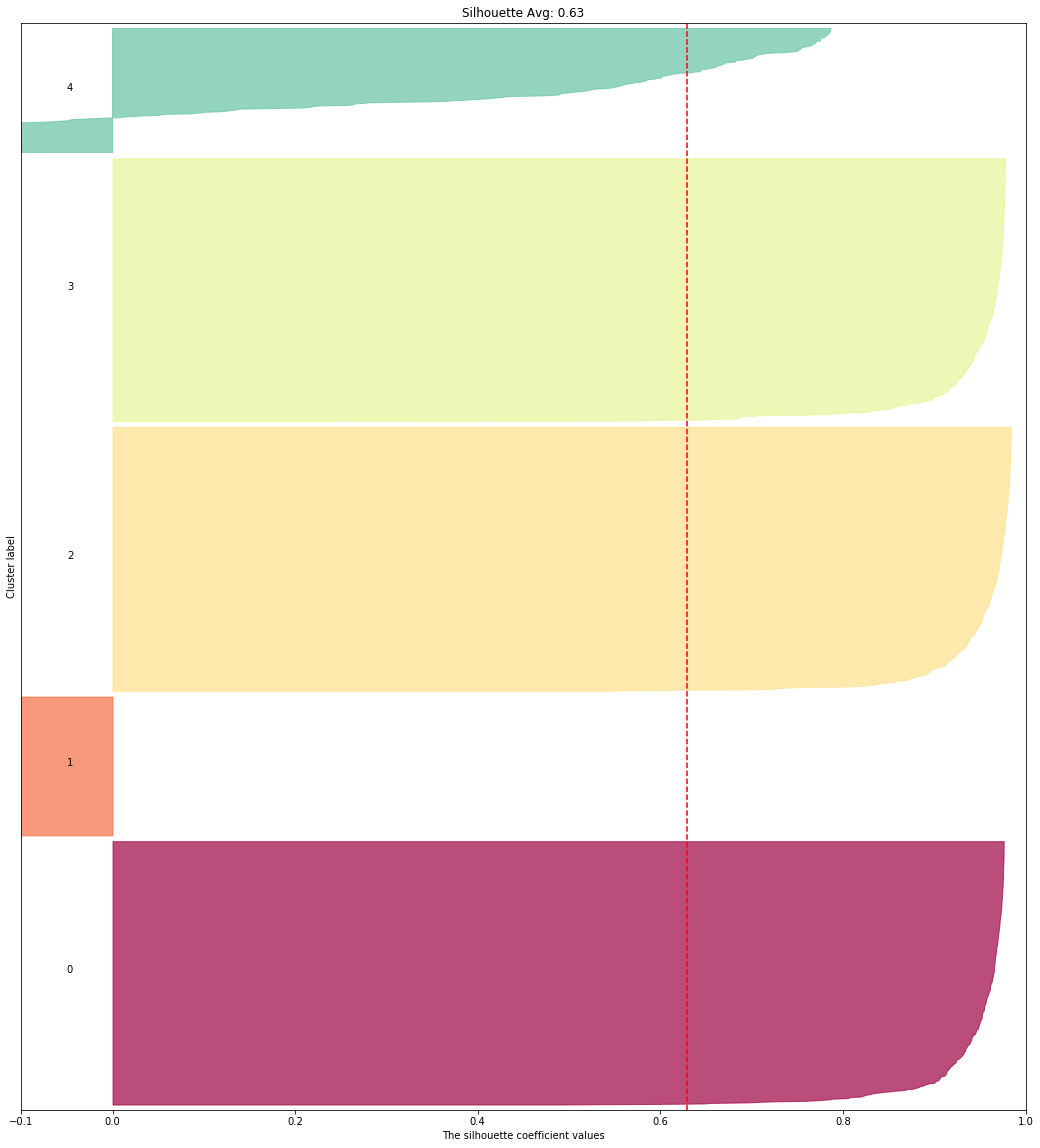

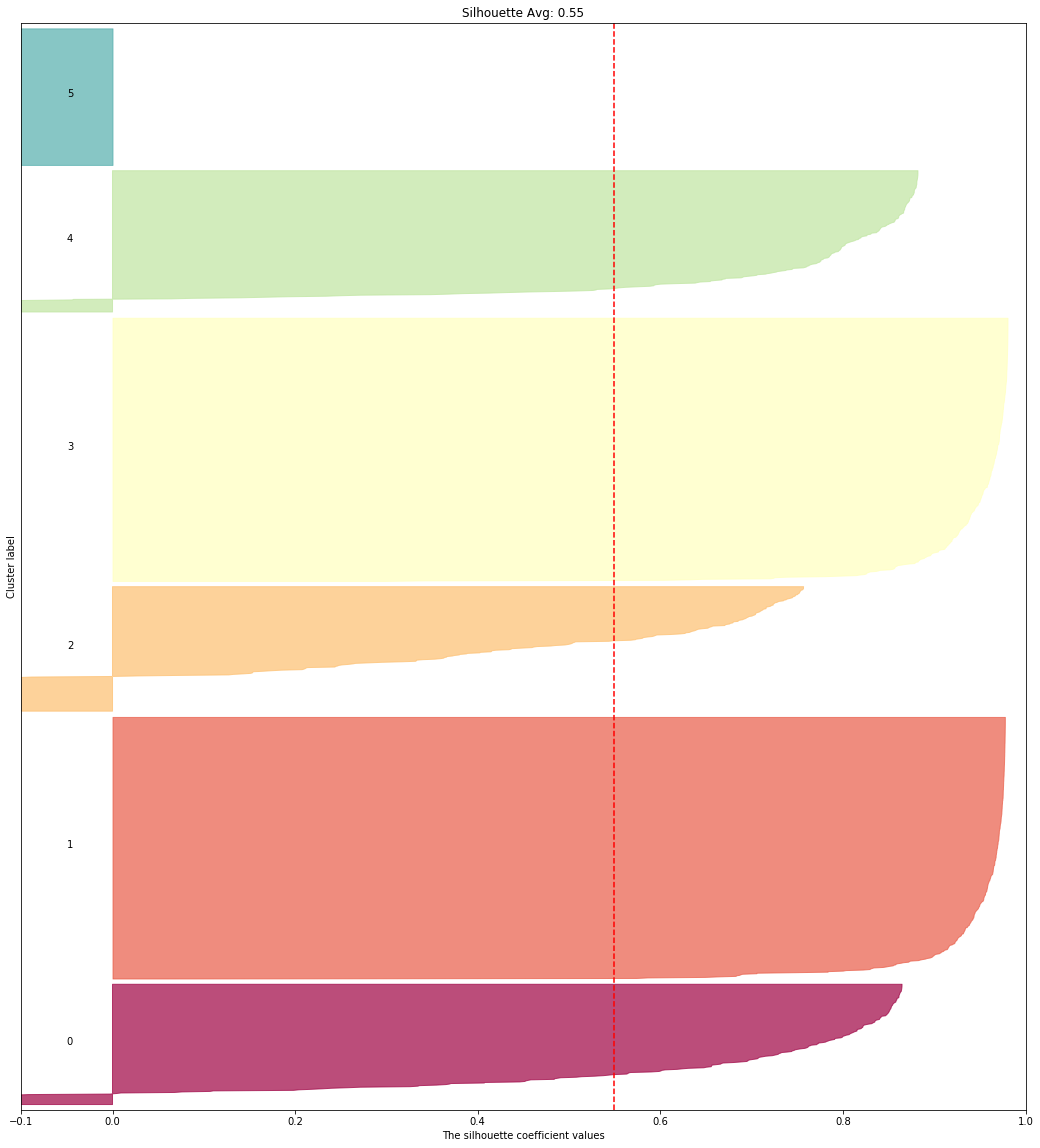

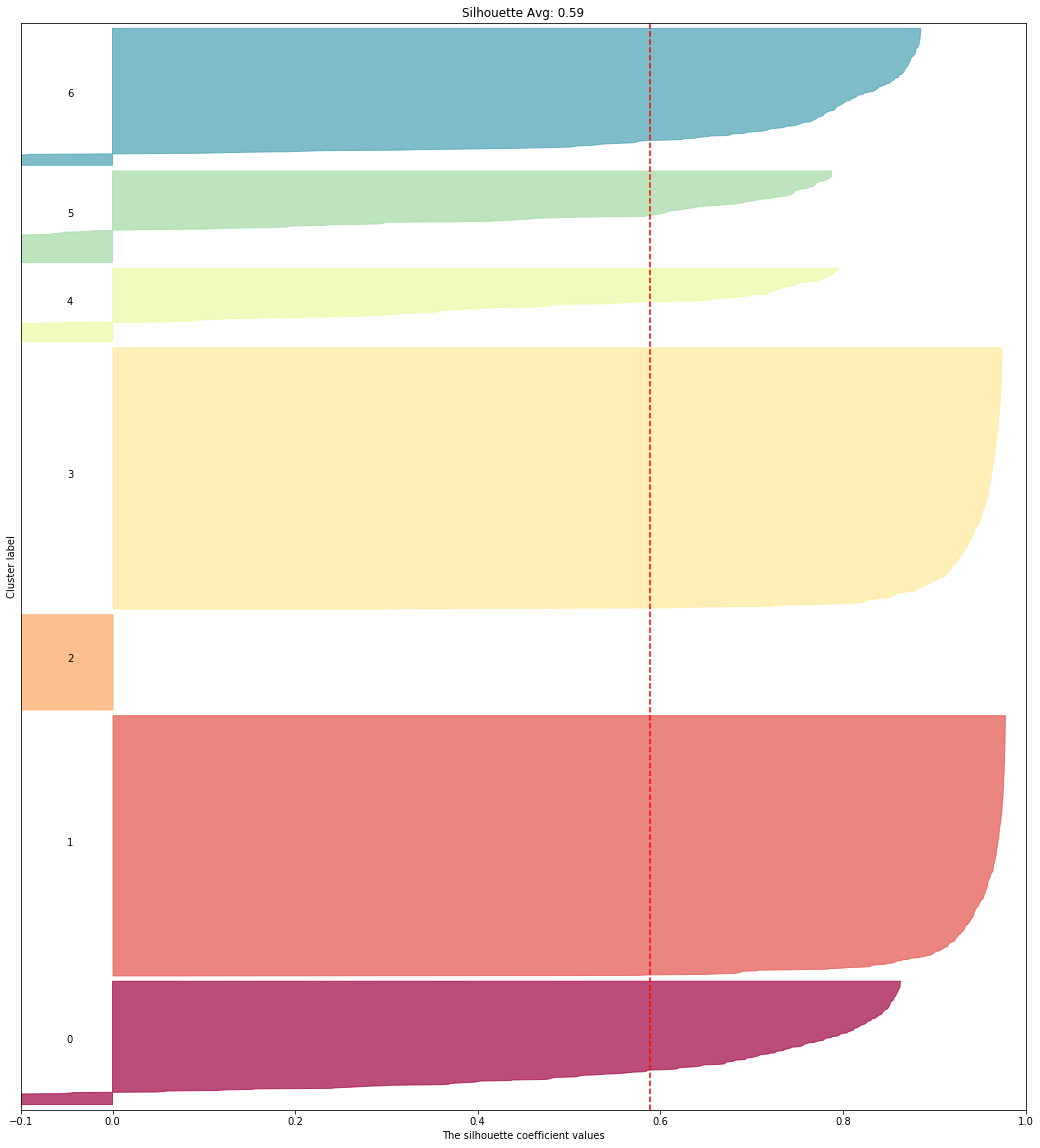

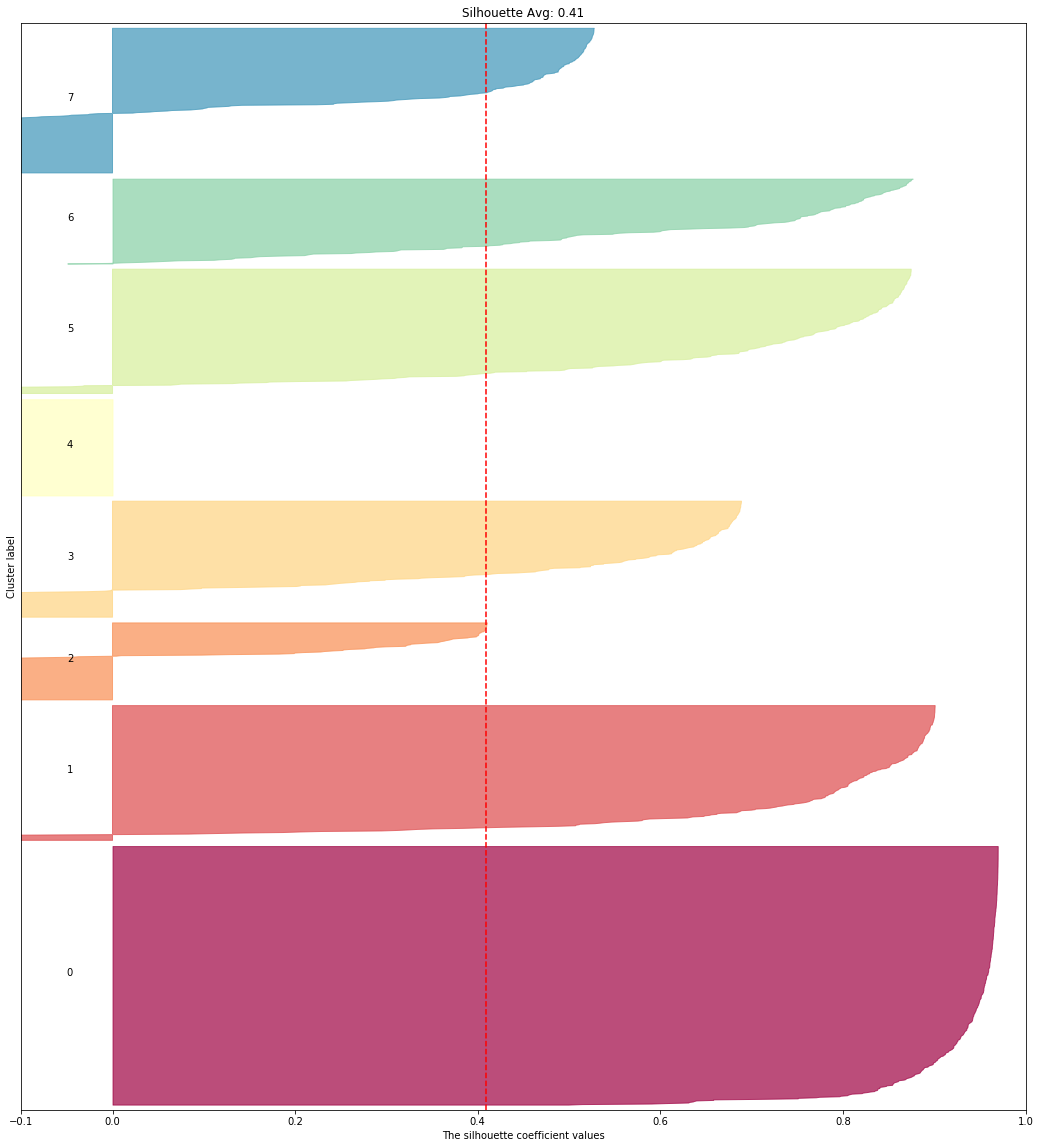

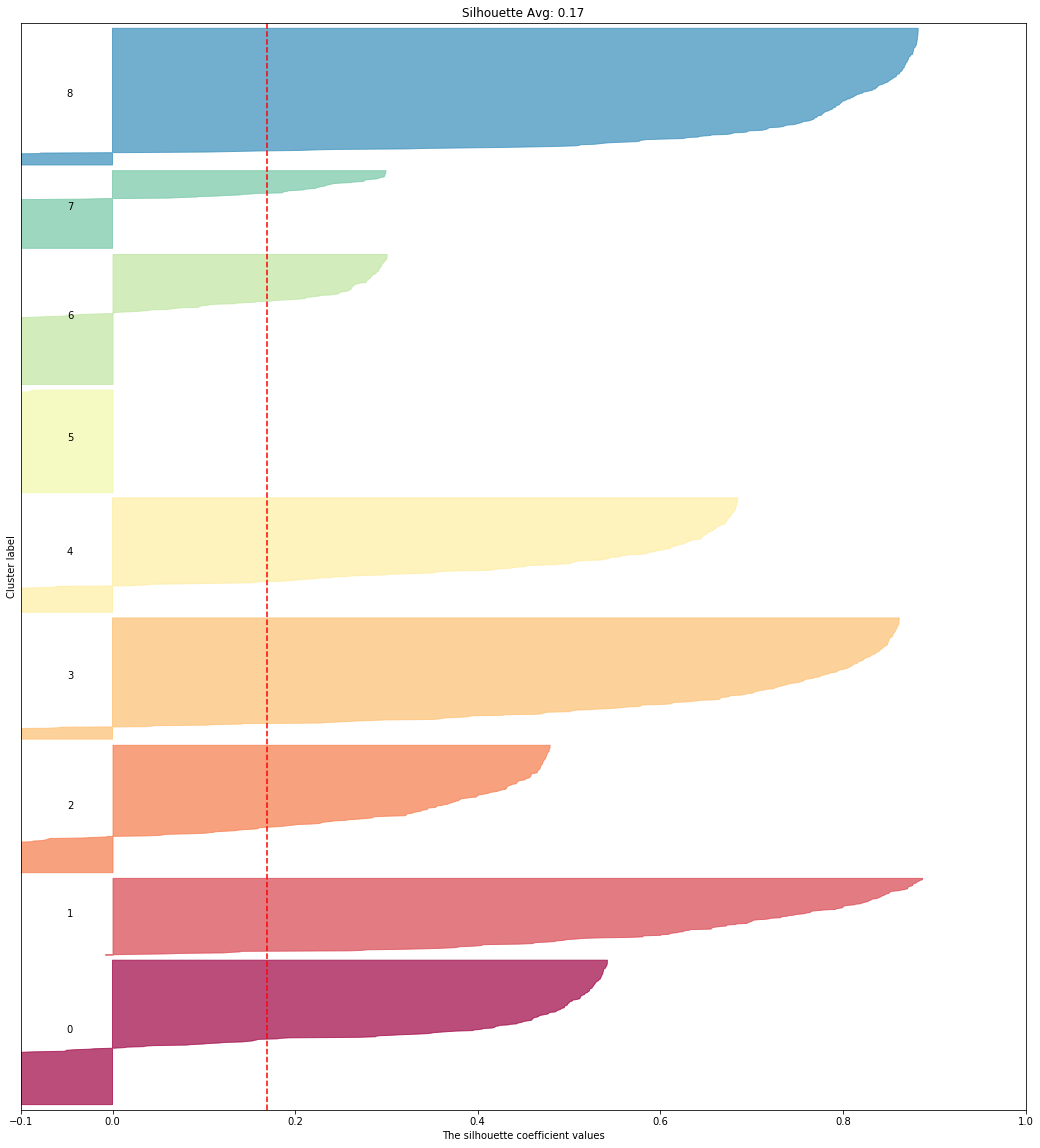

In [13]:
for k in range(k_max-2):
    # Compatibility
    X = data_X
    n_clusters = k+2
    
    silhouette_avg = sils[k]
    # Compute the silhouette scores for each sample
    sample_silhouette_values = sils_sample[k]
    
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 20)
#     fig.set_size_inches(18, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters[k] == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.get_cmap("Spectral")(float(i) / n_clusters)
#         print(n_clusters)
#         print(color)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("Silhouette Avg: %.2f" % silhouette_avg)
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()